
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### About the dataset
> **The TMDb dataset contains:**
>
>The data contains 10866 rows with 21 columns: id, imdb_id, popularity, budget, revenue, original_title, cast, 
    homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date,
       vote_count, vote_average, release_year, budget_adj, revenue_adj

### Research Questions
>
> Question 1: What movies has the highest budget/revenue and in what year was the least/most profitable movie released?
>
> Question 2: What are the most profitable/watched genres?
>
> Question 3: Are highly rated movies associated with profitability?
>
> Question 4: What is the average profitability of released movies?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

**Load dataset and print out a few lines.**

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df['original_title'].str.replace(u'\xa0', ' ').encode('utf-8')

AttributeError: 'Series' object has no attribute 'encode'

### Data Cleaning

In [3]:
# find the size of data
df.shape

(10866, 21)

In [4]:
# this creates a new column from revenue and budget 
df['profit'] = df['revenue'] - df['budget']

In [5]:
# change the datatype for the release_date column
df['release_date'] = pd.to_datetime(df['release_date'])

# drop columns that are not relevant to the analysis
drop_list = ['id', 'homepage', 'tagline', 'imdb_id', 'overview', 'keywords', 'budget_adj', 'revenue_adj']
df.drop(columns=drop_list, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  profit          

In [7]:
# check for duplicated rows
print(sum(df.duplicated()))

1


In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# check for null values
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
profit                     0
dtype: int64

In [10]:
# drop null values in the dataset
df.dropna(inplace=True)

In [11]:
# recheck fir null values
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
profit                  0
dtype: int64

In [12]:
df.shape

(9772, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [13]:
# description of the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,2.805154e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,1.014445e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,1.420195e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,2.544506e+09


Explore all non-nuisance series in the dataframe to have an overview of the dataset.

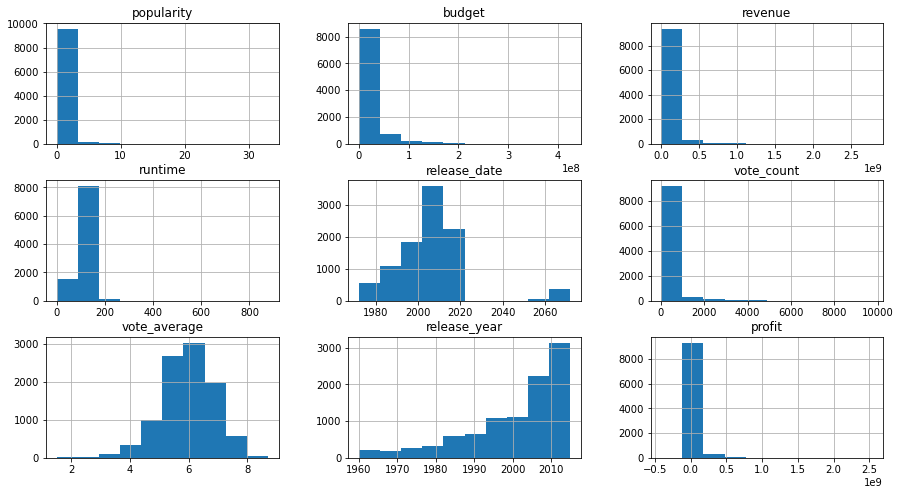

In [14]:
# EDA
df.hist(figsize=(15,8))
plt.show()

In [15]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
popularity,1.000000,0.538921,0.662405,0.156290,0.802956,0.239121,0.110944,0.629354
budget,0.538921,1.000000,0.731204,0.214292,0.627068,0.096051,0.138239,0.566090
revenue,0.662405,0.731204,1.000000,0.183293,0.788533,0.192026,0.071738,0.976261
runtime,0.156290,0.214292,0.183293,1.000000,0.184285,0.193973,-0.133793,0.153456
vote_count,0.802956,0.627068,0.788533,0.184285,1.000000,0.279851,0.124726,0.753782
vote_average,0.239121,0.096051,0.192026,0.193973,0.279851,1.000000,-0.140046,0.201553
release_year,0.110944,0.138239,0.071738,-0.133793,0.124726,-0.140046,1.000000,0.042797
profit,0.629354,0.566090,0.976261,0.153456,0.753782,0.201553,0.042797,1.000000


### Research Question 1: What movies has the highest budget/revenue and in what year was the least/most profitable movie released?


In [16]:
# Movie with the highest budget
high_budget = df.query('budget == {}'.format(df['budget'].max()))

print('Movie with the highest budget is', high_budget.original_title.iloc[0],
      'with budget of', high_budget.budget.iloc[0])

Movie with the highest budget is The Warrior's Way with budget of 425000000


In [17]:
# Movie with highest revenue
high_revenue = df.query('revenue == {}'.format(df['revenue'].max()))

print('Movie with the highest revenue is', high_revenue.original_title.iloc[0],\
      'with revenue of', high_revenue.revenue.iloc[0])

Movie with the highest revenue is Avatar with revenue of 2781505847


In [18]:
# Least profitable movie
least_profit = df.query('profit == {}'.format(df['profit'].min()))

print('The least profitable movie is', least_profit.original_title.iloc[0],
      'released in', least_profit.release_year.iloc[0],
      'with a yield of', least_profit.profit.iloc[0])


# Most profitable movie
most_profit = df.query('profit == {}'.format(df['profit'].max()))

print('The most profitable movie is', most_profit.original_title.iloc[0],
      'released in', most_profit.release_year.iloc[0],
      'with a yield of', most_profit.profit.iloc[0])
      

The least profitable movie is The Warrior's Way released in 2010 with a yield of -413912431
The most profitable movie is Avatar released in 2009 with a yield of 2544505847


It was observed that although The Warrior's Way is the movie with the most budgeted amount, it is the least profitable movie with over 400 million loss.


### Research Question 2: What are the most profitable and most watched genres?
Let's check to see which genres are more popular. To do this, a function that splits the genre column by the delimiter will be defined and then we will count the number of each genre.

In [19]:
# the function count the number of times a genre occurs
def data(col_name):
    
    """ This splits the elements of a given column and counts the number of occurences of each items in the column."""
    
    # combines elements of the column into a string
    data = df[col_name].str.cat(sep='|')
    # split by the delimiter and forms a pandas Series
    data = pd.Series(data.split('|'))
    # get the number of times each item occurs in the column
    genre = data.value_counts(ascending=False)
    return genre

> **Most popular genres**

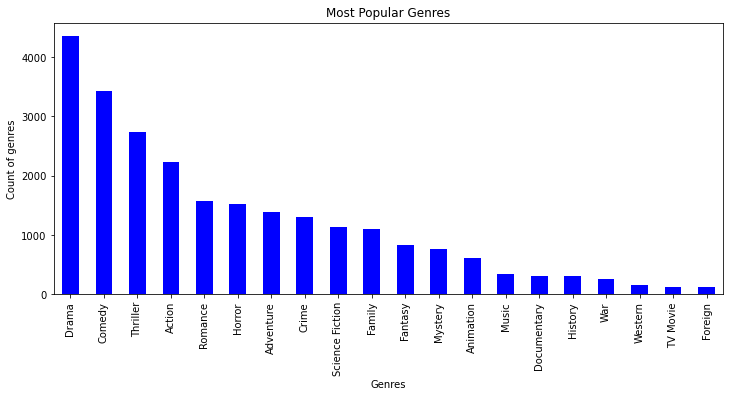

In [20]:
# call function to plot the graph of the most watched genres.
# Create a bar plot of the data with the genres column on the x-axis, and the count of genres on the y-axis.
genre = data('genres').plot(kind="bar", color='b', figsize=(12,5))
genre.set_ylabel('Count of genres') 
genre.set_xlabel('Genres')
plt.title("Most Popular Genres")
plt.show()


We can deduce that Drama, Comedy, Thriller, Action and Romance are the most common genres. They cover 58.2% of genres in the dataset.

In [21]:
# sum of top 5 genres
top_5 = data('genres').head().sum()
# sum of all genres
total = data('genres').sum()

# percentage of the top 5 most popular genres
top_5_prop = (top_5 / total) * 100 
top_5_prop

58.20689655172414

> **Top 10 most profitable genres**

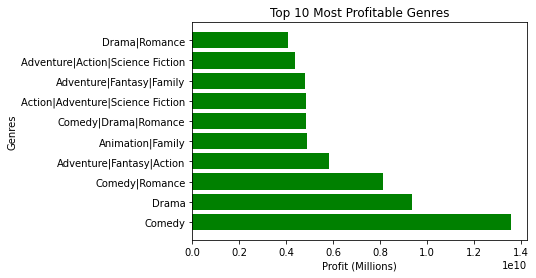

In [22]:
# group data by genres
genre = df.groupby(['genres'])['profit'].sum().reset_index() 
# sort result in descending order
genre = genre.sort_values('profit', ascending=False).head(10)

# Create a bar plot of the data with the genre column on the y-axis, and the sum of profit x-axis.
plt.barh(genre['genres'], genre['profit'], color='g')
plt.xlabel('Profit (Millions)')
plt.ylabel('Genres')
plt.title("Top 10 Most Profitable Genres")
plt.show()

The chart shows the most profitable genres with Comedy, Drama  Comedy|Romance dorminating the group. These group occupy about 48% of the total profit.

In [40]:
# sum of top 3 profit genres
top_3 = genre['profit'].head(3).sum()

# sum of all profit by genres
total = genre['profit'].sum()

# percentage of the top 5 most popular genres
top_5_prop = (top_5 / total) * 100 
top_5_prop

48.021493565955545

### Research Question 3: Are highly rated movies associated with profitability?

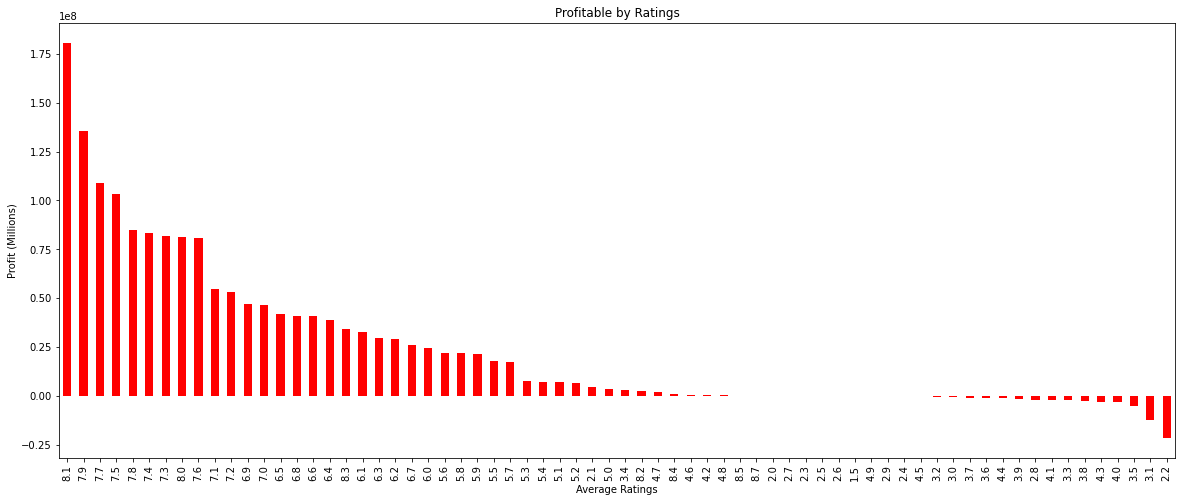

In [23]:
# groups data by vote_average column
# sort in descending order
rating = df.groupby('vote_average')['profit'].mean().sort_values(ascending=False)

# plot data
# Create a bar plot of the data with the vote_average column on the x-axis, and the average profit y-axis.
rating.plot(kind="bar", color='r', figsize=(20,8))
plt.ylabel('Profit (Millions)')
plt.xlabel('Average Ratings')
plt.title("Profitable by Ratings")
plt.show()

This clearly shows that the vote_average may not be a good indicator for profitable as gain flunctuates with votes between **8.4** and **8.7** yielding pretty low profits.

### Research Question 4: What is the average profitability of released movies with regards to the month and year of release?
> Analyse to see the total number of movies released per month and see how profit vary for each month.
>
Create a new column called month which takes in the month of the release_date column. Sort month column in the right sequence before applying to the analysis.

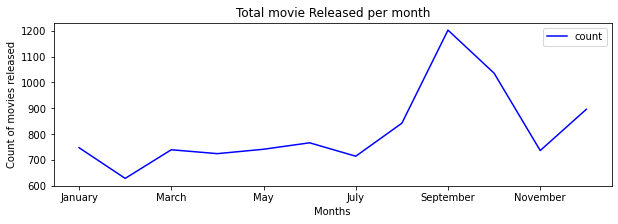

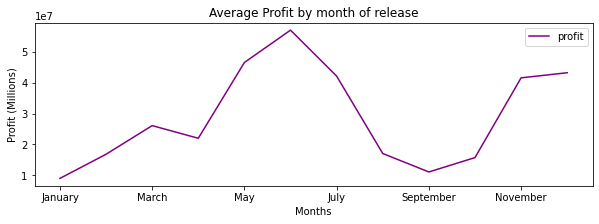

In [30]:
# creates a month column
df['month'] = df['release_date'].dt.month_name(locale='English')

month = df['month'].value_counts().reset_index()

# create a dictionary with the right sequence for the month column
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 
              'September':9, 'October':10, 'November':11, 'December':12}

# Sort month column in the right sequence and apply to the month variable
month.sort_values(by='index', key = lambda x : x.apply (lambda x : month_dict[x]), inplace=True)
month.columns = ['release month', 'count']

# Create a line plot of the data with the month column on the x-axis, and the count of months on the y-axis.
month.plot('release month', 'count', color='b', figsize=(10,3))
plt.ylabel('Count of movies released')
plt.xlabel('Months')
plt.title("Total movie Released per month")

# Create a line plot of the data with the month column on the x-axis, and the average profit on the y-axis.
m = df.groupby('month')['profit'].mean().reset_index()
m.sort_values(by='month', key = lambda x : x.apply (lambda x : month_dict[x]), inplace=True)
m.plot('month', 'profit', color='purple', figsize=(10,3))
plt.ylabel('Profit (Millions)')
plt.xlabel('Months')
plt.title("Average Profit by month of release")
plt.show()

The first plot shows the total number of movies released per month. More movies are released in **September** and fewer in **February**.

The second graph indicated the average profit yielded by month. Although the month of September had the most number of movie released, it shows a deep with regards to profit. 

> **Let's take a look at profitability across the years.**

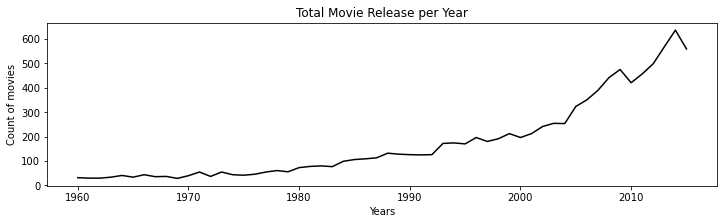

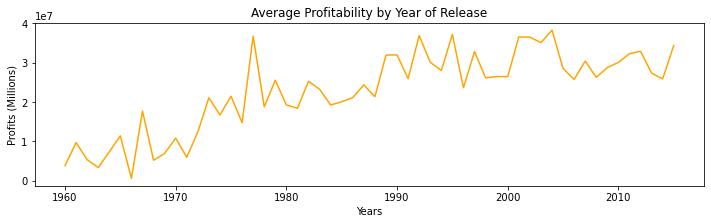

In [33]:
# Create a line plot of the data with the release_year column on the x-axis, and the number of movies on the y-axis.
df.groupby('release_year')['release_year'].count().plot(figsize= (12, 3), color='black')
plt.ylabel('Count of movies')
plt.xlabel('Years')
plt.title("Total Movie Release per Year")
plt.show()

# Create a line plot of the data with the release_year column on the x-axis, and the average profit on the y-axis.
df.groupby('release_year')['profit'].mean().plot(figsize= (12, 3), color='orange')
plt.xlabel('Years')
plt.ylabel('Profits (Millions)')
plt.title('Average Profitability by Year of Release')
plt.show()

The first chart illustrates how the total number of movies released has drastically increased over the years.

The second graph shows the trend of average profit by year of release. Additional research carried out to check the performance in recent years.

<a id='conclusions'></a>
## Conclusions

A new column (profit) which subtracts budget from the revenue column was created. This gives the total amount gained for each movie. The datatype for the release_date column was converted to the datetime format, columns with NaN columns as well as columns that are not relevant to the analysis were dropped. A function that splits the genres column by the delimiter (|) was defined. 

> **Findings**

Although The Warrior's Way had the most budget amount, it is the least profitable movie with over 400 million loss.

The number of movies released have drastically increased over the years. Likewise, profitability has been progessive. More movies were releases on month of September. However, the month of June proves to be the most profitable month with a deep on September.

On average, highly rated moves are more profitable. Drama, Comedy and Thrillers are the 3 most watched genres with an aggregated profit of over 31 billion. However, Comedy, Drama Comedy|Romance dorminates the group with regard to the profit they bring in.
 

> **Limitation**

Wrangling: Rows with missing values and columns that were not relevant for the analysis were removed, this reduced the sample size of the dataset.

Inconsistency in data: The genres column which was very relevant to this analysis contained multiple options and needed to reformated.

Currency wasn't indicated, hence, the value of profit, revenue and budget cannot be specified.

In [24]:
for phrase in df['genres']:
    print(df['genres'].str.split('|')[0])
    
for phrase in asap_list:
    df_clean.replace(to_replace=?, value=?, inplace=True)

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Action',

KeyboardInterrupt: 